# Star Wars Survey

## Introduction

While waiting for Star Wars: The Force Awakens to come out, the team at FiveThirtyEight became interested in answering some questions about Star Wars fans. In particular, they wondered: does the rest of America realize that “The Empire Strikes Back” is clearly the best of the bunch?

The survey received a total of 835 responses that are collected in [their GitHub repository](https://github.com/fivethirtyeight/data/tree/master/star-wars-survey). We have downloaded the dataset from the DataQuest guided project page.

**Note**: The dataset is encoded as "ISO-8859-1" instead of the typical "utf-8". We must take it into account when reading the csv.

## Dictionary

The data has several columns, including:
- **RespondentID** - An anonymized ID for the respondent (person taking the survey)
- **Gender** - The respondent's gender
- **Age** - The respondent's age
- **Household Income** - The respondent's income
- **Education** - The respondent's education level
- **Location (Census Region)** - The respondent's location
- **Have you seen any of the 6 films in the Star Wars franchise?** - Has a Yes or No response
- **Do you consider yourself to be a fan of the Star Wars film franchise?** - Has a Yes or No response

There are several other columns containing answers to questions about the Star Wars movies. For some questions, the respondent had to check one or more boxes. This type of data is difficult to represent in columnar format. As a result, this data set needs a lot of cleaning.

## Importing libraries and Reading CSV

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

star_wars = pd.read_csv("my_datasets/star_wars.csv", encoding="ISO-8859-1")

## First cleaning

We will start exploring the dataset and removing those rows that have a blank "RespondentID":

In [2]:
print("Shape of the read dataset:",star_wars.shape,"\n")
print("Columns names: \n",star_wars.columns, "\n")
print("Number of NaN in RespondentID:",star_wars["RespondentID"].isnull().sum())

Shape of the read dataset: (1187, 38) 

Columns names: 
 Index(['RespondentID',
       'Have you seen any of the 6 films in the Star Wars franchise?',
       'Do you consider yourself to be a fan of the Star Wars film franchise?',
       'Which of the following Star Wars films have you seen? Please select all that apply.',
       'Unnamed: 4', 'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8',
       'Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.',
       'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13',
       'Unnamed: 14',
       'Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her.',
       'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19',
       'Unnamed: 20', 'Unnamed: 21', 'Unnamed: 22', 'Unnamed: 23',
       'Unnamed: 24', 'Unnamed: 25', 'Unnamed: 26', 'Unnamed: 27',
       'Unnamed: 28', 'Which charac

In [3]:
#Let's first check the first 10 rows
print(star_wars.head(10))

   RespondentID Have you seen any of the 6 films in the Star Wars franchise?  \
0           NaN                                           Response             
1  3.292880e+09                                                Yes             
2  3.292880e+09                                                 No             
3  3.292765e+09                                                Yes             
4  3.292763e+09                                                Yes             
5  3.292731e+09                                                Yes             
6  3.292719e+09                                                Yes             
7  3.292685e+09                                                Yes             
8  3.292664e+09                                                Yes             
9  3.292654e+09                                                Yes             

  Do you consider yourself to be a fan of the Star Wars film franchise?  \
0                                           

In [4]:
#Cleaning the "RespondentID" column
star_wars = star_wars[star_wars["RespondentID"].notnull()]
print("Shape of the new dataset:",star_wars.shape)
print("Number of NaN in RespondentID:",star_wars["RespondentID"].isnull().sum())

Shape of the new dataset: (1186, 38)
Number of NaN in RespondentID: 0


## Cleaning and Mapping Yes/No columns

Let's start converting Yes/No columns into boolean columns. In particular, we will transaform:
- Have you seen any of the 6 films in the Star Wars franchise?
- Do you consider yourself to be a fan of the Star Wars film franchise?

Right now, the possible options are Yes/No/NaN and we want True/False/NaN. For that purpose we will use map() method:

In [5]:
yes_no = {
    "Yes": True,
    "No": False
}

In [6]:
print("Before conversion:\n",star_wars["Have you seen any of the 6 films in the Star Wars franchise?"].value_counts(dropna=False),"\n")

star_wars["Have you seen any of the 6 films in the Star Wars franchise?"] = star_wars["Have you seen any of the 6 films in the Star Wars franchise?"].map(yes_no)

print("After conversion:\n",star_wars["Have you seen any of the 6 films in the Star Wars franchise?"].value_counts(dropna=False),"\n")

Before conversion:
 Yes    936
No     250
Name: Have you seen any of the 6 films in the Star Wars franchise?, dtype: int64 

After conversion:
 True     936
False    250
Name: Have you seen any of the 6 films in the Star Wars franchise?, dtype: int64 



In [7]:
print("Before conversion:\n",star_wars["Do you consider yourself to be a fan of the Star Wars film franchise?"].value_counts(dropna=False),"\n")

star_wars["Do you consider yourself to be a fan of the Star Wars film franchise?"] = star_wars["Do you consider yourself to be a fan of the Star Wars film franchise?"].map(yes_no)

print("After conversion:\n",star_wars["Do you consider yourself to be a fan of the Star Wars film franchise?"].value_counts(dropna=False),"\n")

Before conversion:
 Yes    552
NaN    350
No     284
Name: Do you consider yourself to be a fan of the Star Wars film franchise?, dtype: int64 

After conversion:
 True     552
NaN      350
False    284
Name: Do you consider yourself to be a fan of the Star Wars film franchise?, dtype: int64 



## Cleaning and Mapping Checkbox Columns

There some columns related to checkboxes. In particular:

- **Which of the following Star Wars films have you seen? Please select all that apply.** - Whether or not the respondent saw Star Wars: Episode I The Phantom Menace.
- **Unnamed: 4** - Whether or not the respondent saw Star Wars: Episode II Attack of the Clones.
- **Unnamed: 5** - Whether or not the respondent saw Star Wars: Episode III Revenge of the Sith.
- **Unnamed: 6** - Whether or not the respondent saw Star Wars: Episode IV A New Hope.
- **Unnamed: 7** - Whether or not the respondent saw Star Wars: Episode V The Empire Strikes Back.
- **Unnamed: 8** - Whether or not the respondent saw Star Wars: Episode VI Return of the Jedi.

For each of these columns, if the value in a cell is the name of the movie, that means the respondent saw the movie. If the value is NaN, the respondent either didn't answer or didn't see the movie. We'll assume that they didn't see the movie.

We want to rename the columns for an easier understanding and modify its content to True or False:

In [8]:
# Renaming
names_dict = {
    "Which of the following Star Wars films have you seen? Please select all that apply.": "seen_1",
    "Unnamed: 4": "seen_2",
    "Unnamed: 5": "seen_3",
    "Unnamed: 6": "seen_4",
    "Unnamed: 7": "seen_5",
    "Unnamed: 8": "seen_6",
}
star_wars.rename(columns=names_dict, inplace=True)

In [9]:
# Converting non-null cells to True and null cells to False
star_wars[star_wars.columns[3:9]] = star_wars[star_wars.columns[3:9]].notnull()

In [10]:
star_wars[star_wars.columns[3:9]].describe()

,seen_1,seen_2,seen_3,seen_4,seen_5,seen_6
count,1186,1186,1186,1186,1186,1186
unique,2,2,2,2,2,2
top,True,False,False,True,True,True
freq,673,615,636,607,758,738


## Cleaning the Ranking Columns

The next columns are meant to rank the films. 1 means the film was the most favorite, and 6 means it was the least favorite. Each of the following columns can contain the value 1, 2, 3, 4, 5, 6, or NaN:

- **Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.** - How much the respondent liked Star Wars: Episode I The Phantom Menace
- **Unnamed: 10** - How much the respondent liked Star Wars: Episode II Attack of the Clones
- **Unnamed: 11** - How much the respondent liked Star Wars: Episode III Revenge of the Sith
- **Unnamed: 12** - How much the respondent liked Star Wars: Episode IV A New Hope
- **Unnamed: 13** - How much the respondent liked Star Wars: Episode V The Empire Strikes Back
- **Unnamed: 14** - How much the respondent liked Star Wars: Episode VI Return of the Jedi

We need to convert the string content to numbers (float) and rename the columns:

In [11]:
# Renaming
names_dict = {
    "Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.": "ranking_1",
    "Unnamed: 10": "ranking_2",
    "Unnamed: 11": "ranking_3",
    "Unnamed: 12": "ranking_4",
    "Unnamed: 13": "ranking_5",
    "Unnamed: 14": "ranking_6",
}
star_wars.rename(columns=names_dict, inplace=True)

In [12]:
#converting values
star_wars[star_wars.columns[9:15]] = star_wars[star_wars.columns[9:15]].astype(float)

In [13]:
star_wars[star_wars.columns[9:15]].describe()

,ranking_1,ranking_2,ranking_3,ranking_4,ranking_5,ranking_6
count,835.000000,836.000000,835.000000,836.000000,836.000000,836.000000
mean,3.732934,4.087321,4.341317,3.272727,2.513158,3.047847
std,1.656122,1.365365,1.400464,1.825901,1.578620,1.666897
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,3.000000,3.000000,3.000000,2.000000,1.000000,2.000000
50%,4.000000,4.000000,5.000000,3.000000,2.000000,3.000000
75%,5.000000,5.000000,6.000000,5.000000,3.000000,4.000000
max,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000


## Finding the Highest-Ranked Movie

Let's see how are the ranks:

ranking_1    3.732934
ranking_2    4.087321
ranking_3    4.341317
ranking_4    3.272727
ranking_5    2.513158
ranking_6    3.047847
dtype: float64

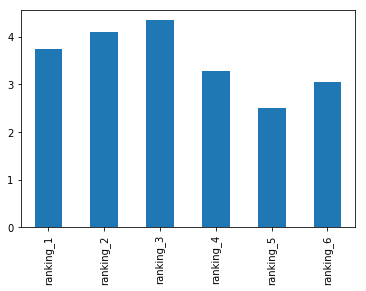

In [15]:
star_wars[star_wars.columns[9:15]].mean().plot.bar()
star_wars[star_wars.columns[9:15]].mean()

Considering that the ranking goes from 1 to 6, telling the preference order, the lower the score the better. That means that the highest-ranked movie is the fifth one: **Star Wars: Episode V The Empire Strikes Back**

We can also see that the 3 old movies are better ranked than the new ones.

## Finding the Most Viewed Movie

We can also explore the number of view of each movie according to the survey:

seen_1    673
seen_2    571
seen_3    550
seen_4    607
seen_5    758
seen_6    738
dtype: int64

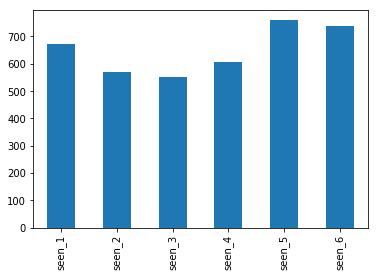

In [17]:
star_wars[star_wars.columns[3:9]].sum().plot.bar()
star_wars[star_wars.columns[3:9]].sum()

Aside from being the top-ranked movie, **Star Wars: Episode V The Empire Strikes Back** is also the most viewed film.

## Exploring Data by Binary Segments

Let's explore the data by segments:
- **Do you consider yourself to be a fan of the Star Wars film franchise?** - True or False
- **Do you consider yourself to be a fan of the Star Trek franchise?** - Yes or No
- **Gender** - Male or Female

By Star Wars fan:

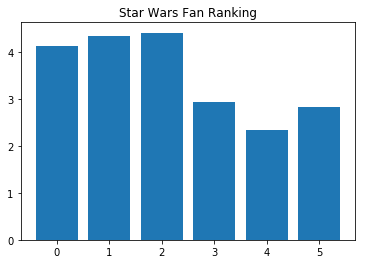

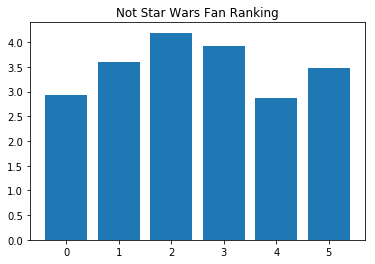

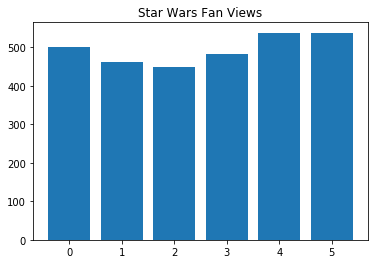

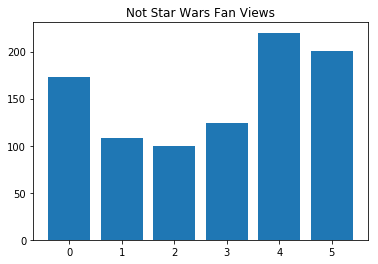

In [35]:
sw_fan = star_wars[star_wars["Do you consider yourself to be a fan of the Star Wars film franchise?"] == True]
not_sw_fan = star_wars[star_wars["Do you consider yourself to be a fan of the Star Wars film franchise?"] == False]

fig, ax = plt.subplots()
ax.bar(range(6),sw_fan[sw_fan.columns[9:15]].mean())
ax.set_title("Star Wars Fan Ranking")
plt.show()

fig, ax = plt.subplots()
ax.bar(range(6),not_sw_fan[not_sw_fan.columns[9:15]].mean())
ax.set_title("Not Star Wars Fan Ranking")
plt.show()

fig, ax = plt.subplots()
ax.bar(range(6),sw_fan[sw_fan.columns[3:9]].sum())
ax.set_title("Star Wars Fan Views")
plt.show()

fig, ax = plt.subplots()
ax.bar(range(6),not_sw_fan[not_sw_fan.columns[3:9]].sum())
ax.set_title("Not Star Wars Fan Views")
plt.show()

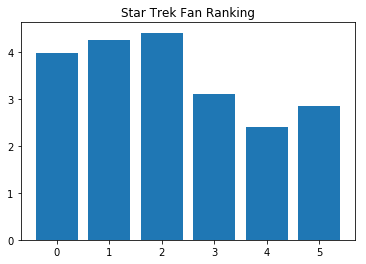

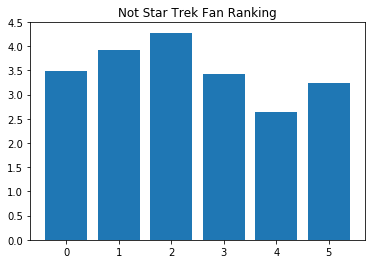

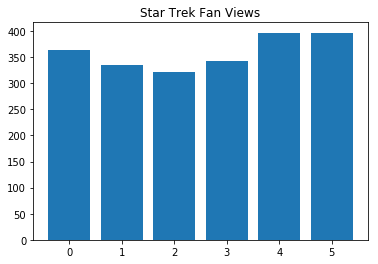

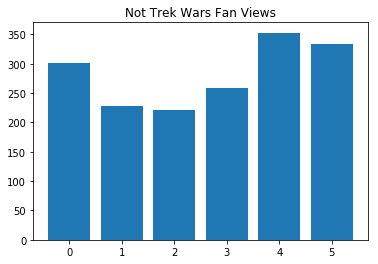

In [37]:
st_fan = star_wars[star_wars["Do you consider yourself to be a fan of the Star Trek franchise?"] == "Yes"]
not_st_fan = star_wars[star_wars["Do you consider yourself to be a fan of the Star Trek franchise?"] == "No"]

fig, ax = plt.subplots()
ax.bar(range(6),st_fan[st_fan.columns[9:15]].mean())
ax.set_title("Star Trek Fan Ranking")
plt.show()

fig, ax = plt.subplots()
ax.bar(range(6),not_st_fan[not_st_fan.columns[9:15]].mean())
ax.set_title("Not Star Trek Fan Ranking")
plt.show()

fig, ax = plt.subplots()
ax.bar(range(6),st_fan[st_fan.columns[3:9]].sum())
ax.set_title("Star Trek Fan Views")
plt.show()

fig, ax = plt.subplots()
ax.bar(range(6),not_st_fan[not_st_fan.columns[3:9]].sum())
ax.set_title("Not Trek Wars Fan Views")
plt.show()

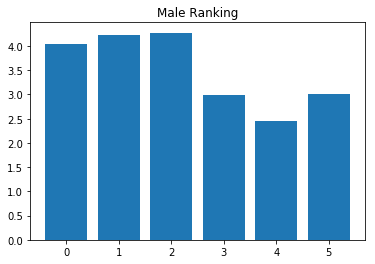

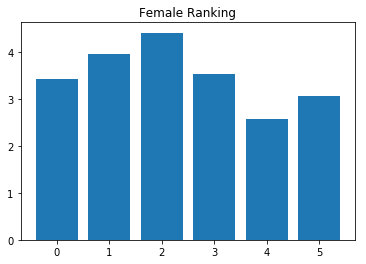

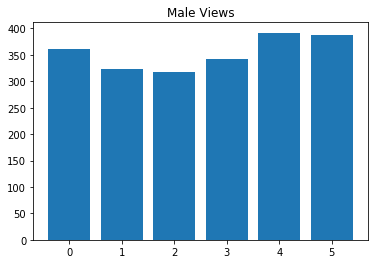

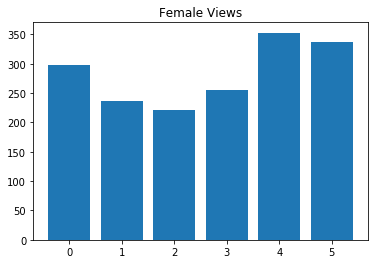

In [41]:
male = star_wars[star_wars["Gender"] == "Male"]
female = star_wars[star_wars["Gender"] == "Female"]

fig, ax = plt.subplots()
ax.bar(range(6),male[male.columns[9:15]].mean())
ax.set_title("Male Ranking")
plt.show()

fig, ax = plt.subplots()
ax.bar(range(6),female[female.columns[9:15]].mean())
ax.set_title("Female Ranking")
plt.show()

fig, ax = plt.subplots()
ax.bar(range(6),male[male.columns[3:9]].sum())
ax.set_title("Male Views")
plt.show()

fig, ax = plt.subplots()
ax.bar(range(6),female[female.columns[3:9]].sum())
ax.set_title("Female Views")
plt.show()